In [1]:
from DataCleaning import *
from def_dict import *

In [2]:
data_path = './data/w58y67/org'
save_path = './data/w58y67/step_1'

In [3]:
data_dir = sorted(glob.glob(data_path + '/*'))
print('*', len(data_dir),'file directories. ')

wav_list = sorted( glob.glob(directory+ '/*.wav') for directory in data_dir )
wav_list = [element for lis in wav_list for element in lis]
print('* Total wav files : ', len(wav_list))

wav_name = np.array([wav.split('/')[-1].split('.')[0] for wav in wav_list])

* 19 file directories. 
* Total wav files :  3210


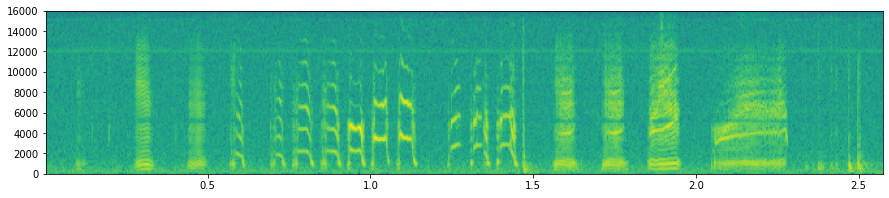

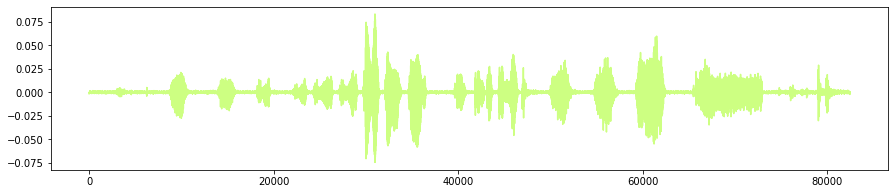

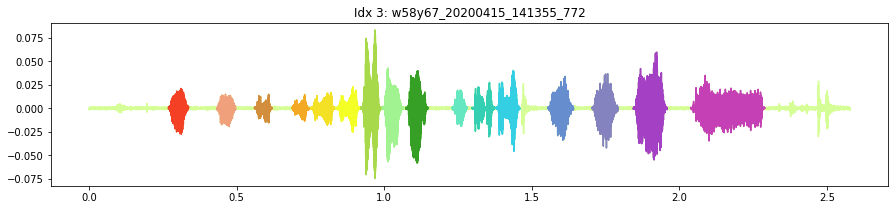

In [4]:
check_wav_img(3, wav_list)

In [5]:
syllable_list = get_syllable_list(wav_list[1900:2000], wav_name)
print('* Output shape: ', syllable_list.shape)

* Finish Idx 1900 wav file :  w58y67_20200424_170038_671
* Finish Idx 1910 wav file :  w58y67_20200424_081237_641
* Finish Idx 1920 wav file :  w58y67_20200424_142559_574
* Finish Idx 1930 wav file :  w58y67_20200424_091928_262
* Finish Idx 1940 wav file :  w58y67_20200424_170006_873
* Finish Idx 1950 wav file :  w58y67_20200424_160614_827
* Finish Idx 1960 wav file :  w58y67_20200424_170307_401
* Finish Idx 1970 wav file :  w58y67_20200424_091037_997
* Finish Idx 1980 wav file :  w58y67_20200425_151134_209
* Finish Idx 1990 wav file :  w58y67_20200425_145208_728
* Output shape:  (1652, 3)


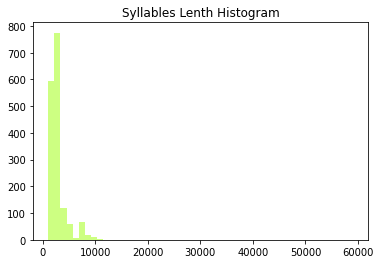

In [6]:
hist_syllable_lenth(syllable_list[:, 2])

In [7]:
abnormal_idx, abnormal_len = get_abnormal(syllable_list, 10000)
print(abnormal_idx)

[1925 1925 1935 1936 1948 1956 1973]


In [8]:
save_abnormal_img(wav_list, abnormal_idx, save_path)

In [9]:
abnormal_wav_idx = [1925, 1936]

In [10]:
syllable_selected = remove_abnormal_syllable(syllable_list, abnormal_wav_idx, 10000)
syllable_selected.shape

(1644, 3)

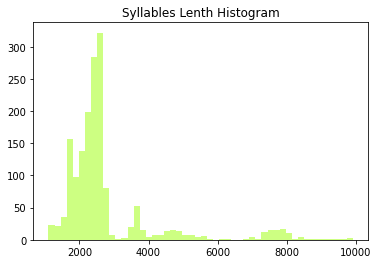

In [11]:
hist_syllable_lenth(syllable_selected[:, 2])

In [12]:
np.save('%s/wav_name'%save_path, wav_name)
np.save('%s/syllables'%save_path, syllable_selected)